In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df=pd.read_csv("Boston.csv",index_col=0)

In [114]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# descriptive analysis of data

In [115]:
df.shape

(506, 14)

In [116]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [117]:
df.isnull().sum()# checking if there is any null value

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [118]:
# from sklearn.preprocessing import MinMaxScaler

In [119]:
# scaler=MinMaxScaler()

In [120]:
# df=scaler.fit_transform(df[["crim"]])

In [121]:
# # plt.figure(figsize=(5,5))
# sns.boxplot(y=df[["crim"]],data=df)
# plt.show()

# checking if there are outliers in our data

### finding the outliers with function

In [122]:

def outlier_cal(data):
    outlier=[]
    Q1=np.percentile(data,25)
    Q3=np.percentile(data,75)
    IQR=Q3-Q1
    value=1.5*IQR
    upper_lim=Q3+value
    lower_lim=Q1-value
    for i in data:
        if i>upper_lim or i<lower_lim:
            outlier.append(i)
    return outlier


In [123]:
result=outlier_cal(df["crim"])
print(result)

[13.5222, 9.2323, 11.1081, 18.4982, 19.6091, 15.288, 9.82349, 23.6482, 17.8667, 88.9762, 15.8744, 9.18702, 20.0849, 16.8118, 24.3938, 22.5971, 14.3337, 11.5779, 13.3598, 38.3518, 9.91655, 25.0461, 14.2362, 9.59571, 24.8017, 41.5292, 67.9208, 20.7162, 11.9511, 14.4383, 51.1358, 14.0507, 18.811, 28.6558, 45.7461, 18.0846, 10.8342, 25.9406, 73.5341, 11.8123, 11.0874, 12.0482, 15.8603, 12.2472, 37.6619, 9.33889, 10.0623, 13.9134, 11.1604, 14.4208, 15.1772, 13.6781, 9.39063, 22.0511, 9.72418, 9.96654, 12.8023, 10.6718, 9.92485, 9.32909, 9.51363, 15.5757, 13.0751, 15.0234, 10.233, 14.3337]


### finding the outliers with the help of visualization using for loop 

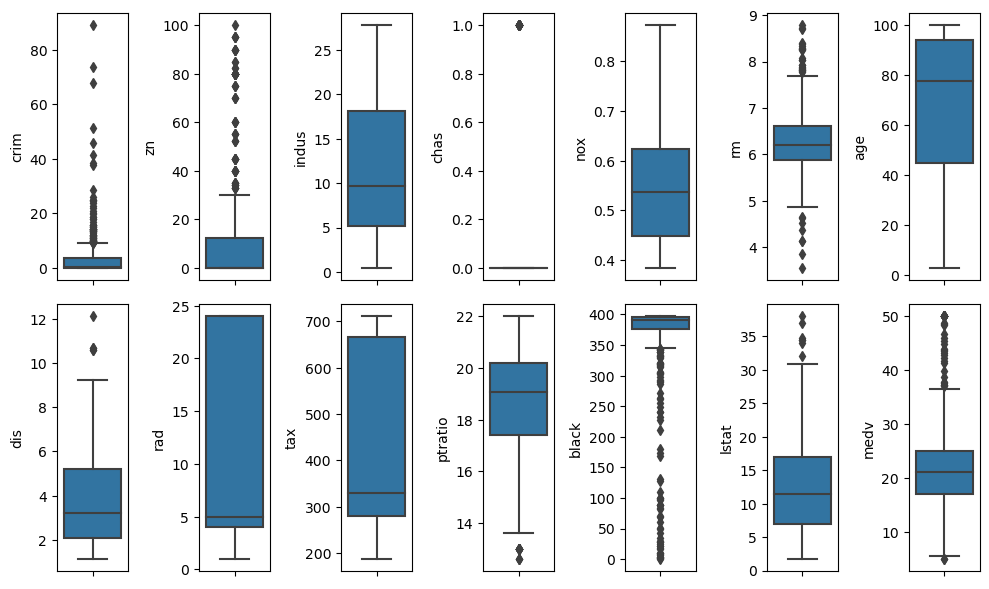

In [127]:
index=0
fig,ax=plt.subplots(nrows=2,ncols=7,figsize=(10,6))
ax=ax.flatten()
for i,j in df.items():
    sns.boxplot(y=i,data=df,ax=ax[index])
    index+=1
plt.tight_layout()
plt.show()
    

    
        

## spliting the data in independent and dependent variables

In [128]:
x=df.iloc[:,0:-1]

In [129]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [130]:
y=df.iloc[:,-1:]

In [131]:
y

,medv
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2
...,...
502,22.4
503,20.6
504,23.9
505,22.0


#### scaling the data using MinMaxScaler

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scaler=MinMaxScaler()

In [134]:
x_sc=scaler.fit_transform(x)

In [135]:
x_sc

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [136]:
y_sc=scaler.fit_transform(y)

In [137]:
y

,medv
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2
...,...
502,22.4
503,20.6
504,23.9
505,22.0


In [139]:
from sklearn.model_selection import train_test_split# importing train_test_split from sklearn library

In [140]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sc,y_sc,test_size=0.2,random_state=42)

In [212]:
from sklearn.ensemble import RandomForestRegressor# importing random forest regressor for regression

In [213]:
regressor=RandomForestRegressor(n_estimators=200,random_state=0)# creating random forest regressor object

In [214]:
regressor.fit(xtrain,ytrain)

C:\Users\asus\AppData\Local\Temp\ipykernel_4420\1597698102.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(xtrain,ytrain)


RandomForestRegressor(n_estimators=200, random_state=0)

In [215]:
regressor.score(xtest,ytest)# checking the score of our model

0.8789041793330459

In [216]:
ypred=regressor.predict(xtest)#predicting the target variable 

In [217]:
ypred.shape

(102,)

In [218]:
ytest.shape

(102, 1)

### visualizing the actual and predicted and errors

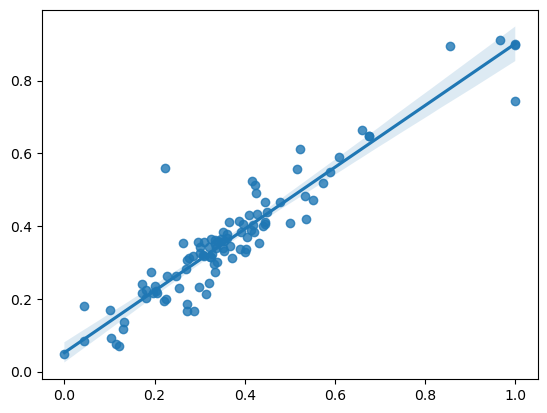

In [219]:
sns.regplot(x=ytest,y=ypred)
plt.show()

In [220]:
error_lst=list(ypred-ytest)

In [221]:
error_lst

[array([-2.38333333e-02,  1.75266667e-01, -1.39944444e-01, -9.02222222e-03,
        -1.51822222e-01, -5.23444444e-02, -9.58333333e-02, -1.78688889e-01,
        -4.81222222e-02, -5.98444444e-02, -6.71444444e-02, -9.49000000e-02,
        -3.29744444e-01, -4.56444444e-02, -8.77222222e-02,  5.91777778e-02,
        -9.39000000e-02, -3.37144444e-01,  4.87288889e-01, -1.92066667e-01,
         2.44111111e-02,  5.27777778e-03, -1.98677778e-01,  2.44444444e-04,
        -1.98511111e-01, -1.97988889e-01, -5.35555556e-02, -2.18288889e-01,
        -1.00622222e-01, -5.83888889e-02, -7.76222222e-02, -9.46666667e-03,
         1.46866667e-01, -7.35000000e-02, -1.99111111e-01, -1.71111111e-01,
         2.50211111e-01, -9.75444444e-02, -5.91333333e-02,  1.70222222e-02,
        -9.12555556e-02,  1.44133333e-01,  4.83177778e-01, -1.01022222e-01,
        -2.98222222e-02, -2.14733333e-01, -1.87944444e-01,  2.01888889e-02,
        -1.17600000e-01,  9.82555556e-02, -5.84777778e-02,  2.32922222e-01,
        -1.4

In [222]:
#squared_error
SE=[]
for i in error_lst:
    s=np.square(i)
    SE.append(s)
print(SE)

[array([5.68027778e-04, 3.07184044e-02, 1.95844475e-02, 8.14004938e-05,
       2.30499872e-02, 2.73994086e-03, 9.18402778e-03, 3.19297190e-02,
       2.31574827e-03, 3.58135753e-03, 4.50837642e-03, 9.00601000e-03,
       1.08731399e-01, 2.08341531e-03, 7.69518827e-03, 3.50200938e-03,
       8.81721000e-03, 1.13666376e-01, 2.37450461e-01, 3.68896044e-02,
       5.95902346e-04, 2.78549383e-05, 3.94728594e-02, 5.97530864e-08,
       3.94066612e-02, 3.91996001e-02, 2.86819753e-03, 4.76500390e-02,
       1.01248316e-02, 3.40926235e-03, 6.02520938e-03, 8.96177778e-05,
       2.15698178e-02, 5.40225000e-03, 3.96452346e-02, 2.92790123e-02,
       6.26056001e-02, 9.51491864e-03, 3.49675111e-03, 2.89756049e-04,
       8.32757642e-03, 2.07744178e-02, 2.33460765e-01, 1.02054894e-02,
       8.89364938e-04, 4.61104044e-02, 3.53231142e-02, 4.07591235e-04,
       1.38297600e-02, 9.65415420e-03, 3.41965049e-03, 5.42527616e-02,
       2.24900011e-02, 2.85749642e-03, 2.31222065e-01, 1.26182827e-03,
     

In [223]:
MSE=np.mean(SE)# calculating mse by using numpy without sklearn
print(MSE)

0.0659043936977943


In [224]:
from sklearn.metrics import mean_squared_error# from sklearn importing mean_squared_error

In [225]:
mse_2=mean_squared_error(ytest,ypred)

In [226]:
mse_2

0.004385389952795935

### mean absolute error

In [227]:
abs_lst=[]
for i in error_lst:
    abs_lst.append(abs(i))
print(abs_lst)

[array([2.38333333e-02, 1.75266667e-01, 1.39944444e-01, 9.02222222e-03,
       1.51822222e-01, 5.23444444e-02, 9.58333333e-02, 1.78688889e-01,
       4.81222222e-02, 5.98444444e-02, 6.71444444e-02, 9.49000000e-02,
       3.29744444e-01, 4.56444444e-02, 8.77222222e-02, 5.91777778e-02,
       9.39000000e-02, 3.37144444e-01, 4.87288889e-01, 1.92066667e-01,
       2.44111111e-02, 5.27777778e-03, 1.98677778e-01, 2.44444444e-04,
       1.98511111e-01, 1.97988889e-01, 5.35555556e-02, 2.18288889e-01,
       1.00622222e-01, 5.83888889e-02, 7.76222222e-02, 9.46666667e-03,
       1.46866667e-01, 7.35000000e-02, 1.99111111e-01, 1.71111111e-01,
       2.50211111e-01, 9.75444444e-02, 5.91333333e-02, 1.70222222e-02,
       9.12555556e-02, 1.44133333e-01, 4.83177778e-01, 1.01022222e-01,
       2.98222222e-02, 2.14733333e-01, 1.87944444e-01, 2.01888889e-02,
       1.17600000e-01, 9.82555556e-02, 5.84777778e-02, 2.32922222e-01,
       1.49966667e-01, 5.34555556e-02, 4.80855556e-01, 3.55222222e-02,
     

In [228]:
MAE=np.mean(abs_lst)
print(MAE)

0.18897293562305095


In [229]:
from sklearn.metrics import mean_absolute_error

In [230]:
MAE_2=mean_absolute_error(ytest,ypred)
print(MAE_2)

0.04666808278867104


### Root mean squared error

In [231]:
rmse=np.sqrt(MSE)
print(rmse)

0.2567185106255377


In [232]:
rmse_2=mean_squared_error(ytest,ypred,squared=False)
rmse_2

0.06622227686206458

### R2score

In [233]:
#sum of squared_error:
from sklearn.metrics import r2_score




In [234]:
r2_score=r2_score(ytest,ypred)
r2_score

0.8789041793330459

### using kfold cross validation

In [244]:
from sklearn.model_selection import KFold# importing kfold from sklearn

In [245]:
KF=KFold(n_splits=5)#creating an object of kfold class 
KF

KFold(n_splits=5, random_state=None, shuffle=False)

In [246]:
from sklearn.model_selection import cross_val_score# importing cross validation score from sklearn

In [247]:
y=np.array(y)# changing the data into array
y=y.ravel()# chanding the dimension of the array

In [248]:
rf_cross_val=cross_val_score(RandomForestRegressor(random_state=42),x,y,cv=5)

In [249]:
print(rf_cross_val)

[0.77231143 0.85753737 0.74161095 0.4693153  0.29457589]
